In [4]:
import numpy as np
import networkx as nx
from grakel import GraphKernel
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [5]:
from torch_geometric.datasets import TUDataset
tu_data = TUDataset(root="tutorial1",name= "Yeast")
# https://pytorch-geometrimport networkx as nx
t1 = tu_data[1]
len(t1)

4

In [6]:
len(tu_data)

79601

In [7]:
G1 = to_networkx(t1, node_attrs=["x"], edge_attrs=["edge_attr"])

In [8]:
t2 = tu_data[2]
len(t2)

4

In [9]:
G2 = to_networkx(t2, node_attrs=["x"], edge_attrs=["edge_attr"])

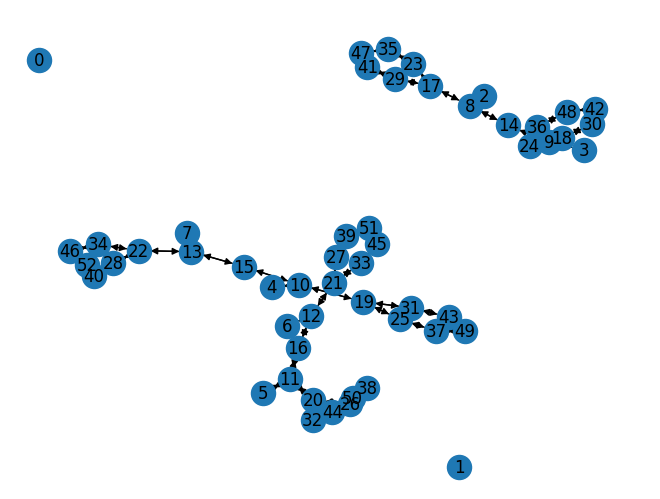

In [276]:
nx.draw(G1, with_labels = True)
plt.show()

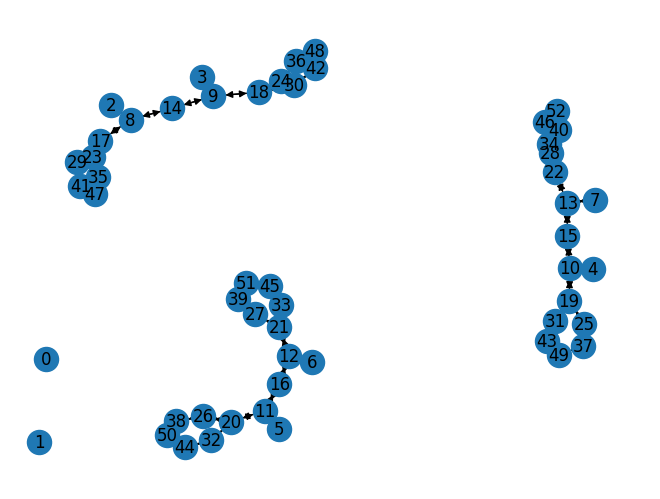

In [277]:
nx.draw(G2, with_labels = True)
plt.show()

### Cosine Degree Kernel 

#### The Cosine Degree Kernel for graph similarity is a measure that captures the similarity between two graphs based on the cosine similarity of their degree vectors. 
#### The degree vector of a graph is a vector where each element corresponds to the degree of a node in the graph.

### To prove Cosine Kernel is Symmetric  , we need to show that K(G1, G2) == K(G2,G1) for any 2 graphs

### Cosine Degree Kernel for graph similarity is positive definite, we can use the fact that a kernel matrix is positive definite if and only if it is symmetric and all of its eigenvalues are non-negative

In [301]:
import networkx as nx
import numpy as np
from scipy.linalg import eigvals 

def graph_feature_vector(graph):
    degrees = dict(graph.degree())
    features = [degrees[node] for node in graph.nodes()]
    return features

def cosine_degree_similarity(graph1, graph2):
    features1 = graph_feature_vector(graph1)
    features2 = graph_feature_vector(graph2)
    
    dot_product = np.dot(features1, features2)
    norm1 = np.linalg.norm(features1)
    norm2 = np.linalg.norm(features2)

    similarity = dot_product / (norm1 * norm2 + 1e-10)  # Adding a small constant for numerical stability
    return similarity

def compute_kernel_matrix(graphs):
    n = len(graphs)
    kernel_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            kernel_matrix[i, j] = cosine_degree_similarity(graphs[i], graphs[j])

    return kernel_matrix

def is_semi_positive_definite(matrix, epsilon=1e-6):
  """
  Checks if a matrix is semi-positive definite using regularization.

  Args:
      matrix: The matrix to be tested.
      epsilon: A small value to handle numerical errors.

  Returns:
      True if the matrix is semi-positive definite, False otherwise.
  """

  # Check for symmetry
  if not np.allclose(matrix, matrix.T):
    return False

  # Regularize the matrix by adding a small value to the diagonal
  regularized_matrix = matrix + np.diag(np.ones(matrix.shape[0]) * epsilon)

  # Check if all eigenvalues are non-negative
  eigenvalues, _ = np.linalg.eig(regularized_matrix)
  return np.all(eigenvalues >= 0)

# Compute cosine degree similarity matrix
graphs = [G1,G2]
kernel_matrix = compute_kernel_matrix(graphs)

# Check if the kernel matrix is positive semi-definite
positive_semi_definite = is_semi_positive_definite(kernel_matrix)

# Print the result
print("Is the kernel matrix positive semi-definite?", positive_semi_definite)


Is the kernel matrix positive semi-definite? True


In [303]:

def is_kernel_symmetric(graphs):
    """
    Checks if the cosine degree similarity kernel is symmetric for a set of graphs.

    Args:
        graphs: A list of networkx DiGraphs representing the graphs.

    Returns:
        True if the kernel matrix is symmetric, False otherwise.
    """

    kernel_matrix = compute_kernel_matrix(graphs)

    # Check for symmetry by comparing transposed elements
    for i in range(len(graphs)):
        for j in range(i + 1, len(graphs)):
            if not np.allclose(kernel_matrix[i, j], kernel_matrix[j, i]):
                return False

    return True

In [304]:
is_kernel_symmetric([G1,G2])

True

### Import CosineKernel as GrakelKernel from cosine_degree_similarity_kernel 

#### Run Unit-test in the Cosine Similarity Degree Kernel

In [1]:
%run cosine_degree_similarity_kernel.py

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/convert.py:118: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
..
----------------------------------------------------------------------
Ran 2 tests in 0.475s

OK


In [12]:
import cosine_degree_similarity_kernel

In [13]:
kernel = CosineDegreeSimilarity()
kernel.pairwise_operation(G1, G2)

0.9999999999995934